# **BANK CUSTOMER CHURN PREDICTION**

## **Objective of the study:**
  
* The aim of this project is to develop a predictive model for customer churn in a subscription-based service or business.
*  Customer churn, or customer attrition, refers to the rate at which customers stop using a service.
*  By analyzing historical customer data and utilizing machine learning algorithms such as Logistic Regression, Random Forests, or Gradient Boosting,aim to predict which customers are likely to churn in the future.



## **Importing Libraries**

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## **Read the dataset**

In [11]:
df=pd.read_csv('Churn_Modelling.csv')

In [12]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [13]:
#To print the first 5 rows using head function
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
#To print the last 5 rows using tail function
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [15]:
#view the shape of dataset
df.shape

(10000, 14)

**Observation:**    

The Df has 1000 rows with 14 attributes. We review this further to identify what attributes will be necessary and what data manipulation needs to be carried out before Exploratory analysis and prediction modelling

In [16]:
#view the dataset dimension
df.ndim

2

In [17]:
#view the all columns in the dataset
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [18]:
#checking for missing values
df.isna().any()

,0
RowNumber,False
CustomerId,False
Surname,False
CreditScore,False
Geography,False
Gender,False
Age,False
Tenure,False
Balance,False
NumOfProducts,False


In [19]:
#To check for the duplicate values
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [20]:
#Removing duplicate rows
df=df.drop_duplicates()
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [21]:
#After removing duplicate values checking the number of rows and columns
df.shape

(10000, 14)

In [22]:
#check the descriptive statistics of numeric variables
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Observation**
* The average age of the customers is 39.  
* Tenure is maximum 10 years which assume age of the bank.   
* Minimum value and first quantiles of balance are equal 0 which means the distribution may not
be normal.  


In [23]:
#view the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Observation:**  
Here,  
* surname,geography and gender are in object type.
* balance,estimated salary are in float data type.   
* and the remainders are in int data type.   



In [24]:
#checking unique value to object type columns
features=['Surname','Geography','Gender']
for i in features:
  print(df[i].unique(),i)
  print('----------------')

['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge'] Surname
----------------
['France' 'Spain' 'Germany'] Geography
----------------
['Female' 'Male'] Gender
----------------


In [25]:
# checking value counts of each column
features=['RowNumber','CustomerId','Surname','CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']

for i in features:

  print(df[i].value_counts(),i)
  print('--------------------')

RowNumber
1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: count, Length: 10000, dtype: int64 RowNumber
--------------------
CustomerId
15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: count, Length: 10000, dtype: int64 CustomerId
--------------------
Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64 Surname
--------------------
CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: count, Length: 460, dtype: int64 CreditScore
--------------------
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64 Geography
------------------

**Observation:**  
From the above, we will not require the first 2 attributes as the are specific to a customer. It is borderline with the surname as this would result to profiling so we exclude this as well.

In [26]:
#Drop the columns which are not necessary
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [27]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [28]:
df.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


**Observation:**  
So we moslty have categorical variables and 5 continuous variables.

### **Visualizing categorical variables**

<Axes: xlabel='Gender', ylabel='count'>

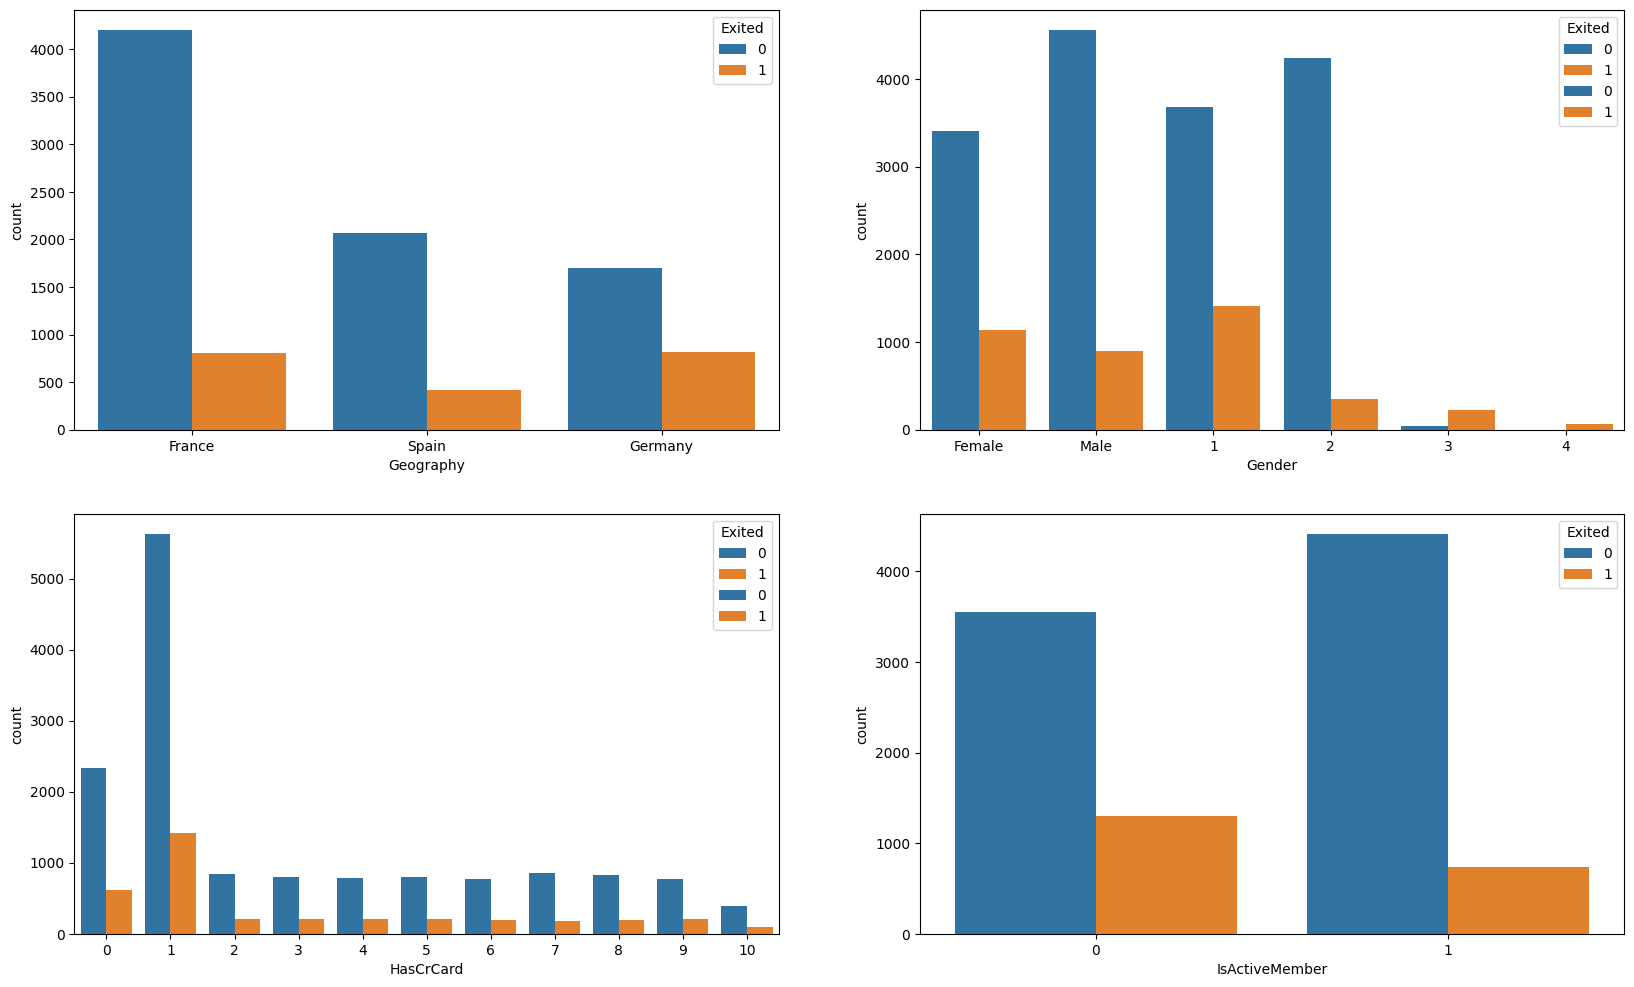

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])
sns.countplot(x='Tenure', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='NumOfProducts', hue = 'Exited',data = df, ax=axarr[0][1])

**Observation:**


* Majority of the customers are from france. However, the proportion of churned customers is with inversely related to the population of customers alluding to the bank possibly having a problem (maybe not enough customer service resources allocated) in the areas where it has fewer clients.   

* The proportion of female customers churning is also greater than that of male customers.  

* Interestingly, majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence.   
* Most of the customers have 1 or 2 products and most customers which churned are having 1
products maybe they are not satisfied so they are churning.     
* .Majority of customers have tenure between 1 to 9 and churing rate is also high between these
tenures.



* Unsurprisingly the inactive members have a greater churn. Worryingly is that the overall proportion of inactive mebers is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definately have a positive impact on the customer churn.   


### **Visualizing continuous variables**

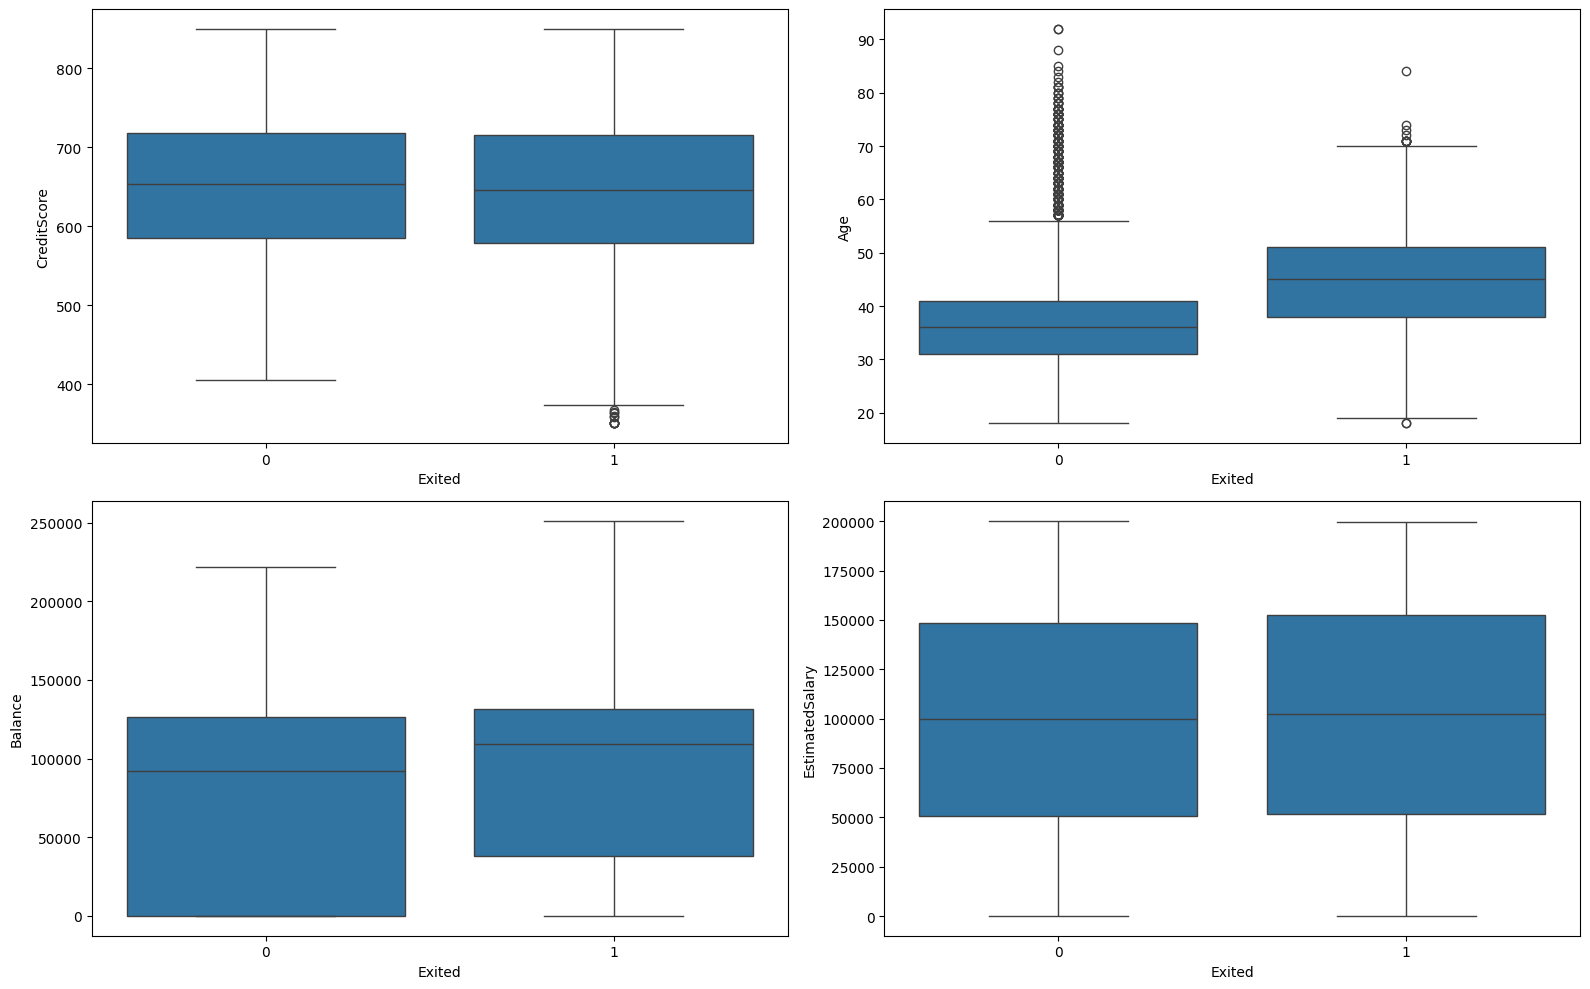

In [30]:
fig, ax = plt.subplots(2, 2, figsize = (16, 10))
sns.boxplot(x = 'Exited', y = 'CreditScore', data = df, ax = ax[0][0])
sns.boxplot(x = 'Exited', y = 'Age', data = df, ax = ax[0][1])
sns.boxplot(x = 'Exited', y = 'Balance', data = df, ax = ax[1][0])
sns.boxplot(x = 'Exited', y = 'EstimatedSalary', data = df, ax = ax[1][1])
plt.tight_layout()
plt.show()

**Observation:**

* There is no significant difference in credit score distribution etween custers which are churned or
not.

* The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories.   
*  The bank may need to review their target market or review the strategy for retention between the different age groups
With regard to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.   

* Worryingly, the bank is losing customers with significant bank balances which is likely to hit their available capital for lending.
Neither the product nor the salary has a significant effect on the likelihood to churn.

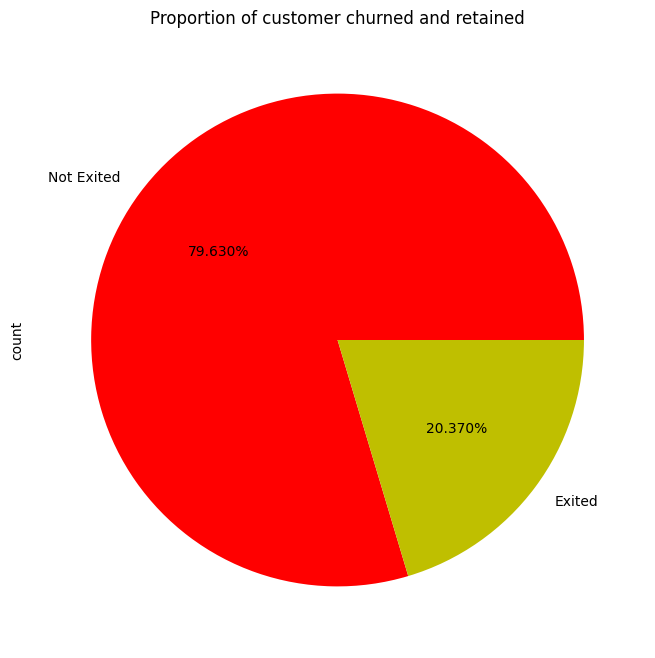

In [31]:
plt.figure(figsize=(8,8))
labels = ['Not Exited', 'Exited']
df["Exited"].value_counts().plot(kind='pie',labels = labels,autopct='%1.3f%%',colors=['r','y'])
labels = ['Not Exited', 'Exited']
plt.title("Proportion of customer churned and retained")
plt.show()


**Observation**:  
So about 20% of the customers have churned. So the baseline model could be to predict that 20% of the customers will churn. Given 20% is a small number, we need to ensure that the chosen model does predict with great accuracy this 20% as it is of interest to the bank to identify and keep this bunch as opposed to accurately predicting the customers that are retained.

**Observation:**

Overall,the correaltion is very weak  

* weak positive correlation with age   

* very weak positive correlation with balance   

* very weak negative correlation with number of products and membership

In [32]:
#check varaible data types of all columns
df.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


### **convert categorical variables into numerical format**

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lst=['Geography','Gender']
for i in lst:
  df[i]=le.fit_transform(df[i])
  df

In [34]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


Here the value indicates:   

female=0,
male=1

france=2,spain=0,germany=1

In [35]:
cor_mtx=df.corr()['Exited']
cor_mtx

,Exited
CreditScore,-0.027094
Geography,0.035943
Gender,-0.106512
Age,0.285323
Tenure,-0.014001
Balance,0.118533
NumOfProducts,-0.047820
HasCrCard,-0.007138
IsActiveMember,-0.156128
EstimatedSalary,0.012097


<Axes: >

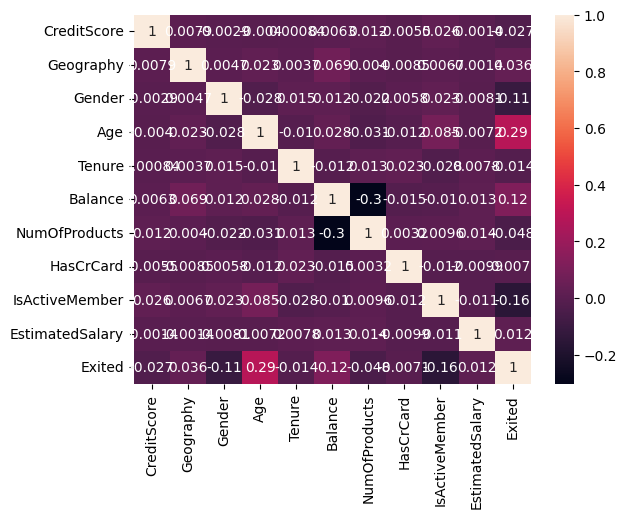

In [36]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

# **MODEL CREATION**

# **Classification Algorithms**
1. **RANDOM FOREST**

2. **ADA BOOST**

3. **LOGISTIC REGRESSION**

### **split the data frame into x and y**

In [37]:
x=df.drop('Exited',axis=1)
y=df['Exited']

In [38]:
#predictors
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [39]:
#target
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [40]:
x.shape

(10000, 10)

In [41]:
y.shape

(10000,)

### **Train Test Split**


* The train-test split is a technique for evaluating the performance of a machine Learning algoritham.     

* Train Dataset Used to fit the machine learning model.   

* choosing split percentage:Train:80%,Test 20%

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
#train base size
x_train.shape,y_train.shape

((8000, 10), (8000,))

In [44]:
#test base size
x_test.shape,y_test.shape

((2000, 10), (2000,))

## **SCALING**   


In [45]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [46]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


# **CLASSIFICATION ALGORITHMS**

## **1) RandomForest Classifier**

In [47]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=5,max_features=5)
forest_model.fit(x_train,y_train)
y_pred6 = forest_model.predict(x_test)
y_pred6


array([0, 0, 0, ..., 1, 0, 0])

In [48]:
#confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result = confusion_matrix(y_test,y_pred6)
print(result)
labels=[0,1]
cmd = ConfusionMatrixDisplay(result,display_labels=labels)

[[1558   49]
 [ 235  158]]


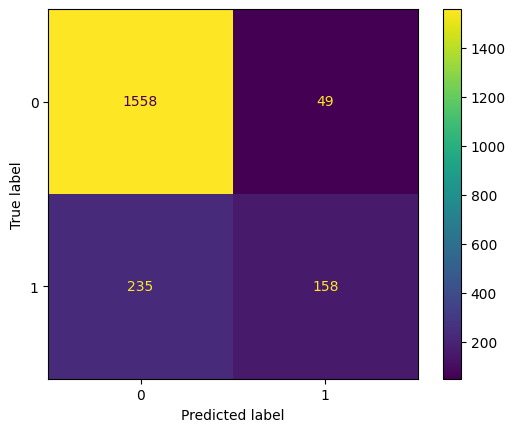

In [49]:
cmd.plot()

From RandomForest ConfusionMatrix we observe that:
* 1558 customers are correctly classified under not “churned” category & 49 are misclassified
* 159 customers are correctly classified under “churned” category & 234 are misclassified

In [50]:
#Accuracy score and classification report
from sklearn.metrics import accuracy_score,classification_report

a=accuracy_score(y_test,y_pred6)
print('Accuracy: ',a*100,'\n')
print(classification_report(y_test,y_pred6))


Accuracy:  85.8 

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.76      0.40      0.53       393

    accuracy                           0.86      2000
   macro avg       0.82      0.69      0.72      2000
weighted avg       0.85      0.86      0.84      2000



In [51]:
training_score =forest_model.score(x_train,y_train)
training_score

0.859375

In [52]:
testing_score = forest_model.score(x_test,y_test)
testing_score

0.858

## **2) XgBoost**

In [53]:
from xgboost import XGBClassifier
xg_model = XGBClassifier()
xg_model.fit(x_train,y_train)
y_pred8 = xg_model.predict(x_test)
y_pred8

array([0, 0, 0, ..., 1, 0, 1])

In [54]:
#confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result=confusion_matrix(y_test,y_pred8)
print(result)
labels=[0,1]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)

[[1523   84]
 [ 194  199]]


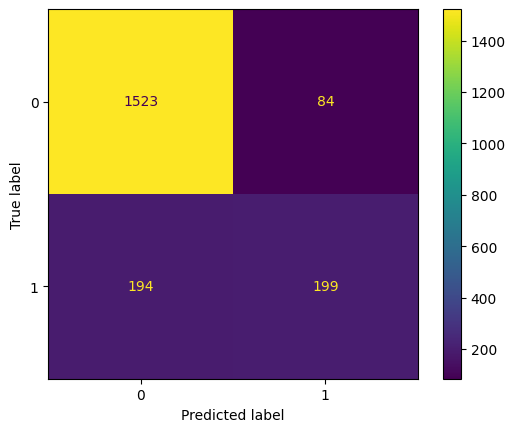

In [55]:
cmd.plot()

From XgBoost ConfusionMatrix we observe that:   

* 1523 customers are correctly classified under not “churned” category & 84 are misclassified   

* 199 customers are correctly classified under “churned” category & 194 are misclassified

In [56]:
#Accuracy score and classification report
from sklearn.metrics import accuracy_score,classification_report

b=accuracy_score(y_test,y_pred8)
print('Accuracy: ',b*100,'\n')
print(classification_report(y_test,y_pred8))

Accuracy:  86.1 

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.70      0.51      0.59       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [57]:
training_score = xg_model.score(x_train,y_train)
training_score

0.955375

In [58]:
testing_score = xg_model.score(x_test,y_test)
testing_score

0.861

## **3) LogisticRegression**

In [59]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
y_pred9 = lr_model.predict(x_test)
y_pred9

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
#confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result=confusion_matrix(y_test,y_pred9)
print(result)
labels=[0,1]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)

[[1559   48]
 [ 321   72]]


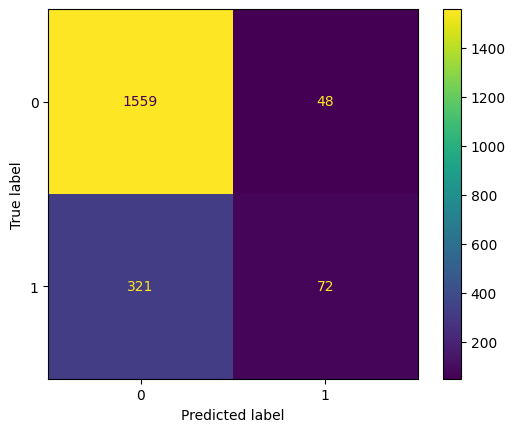

In [61]:
cmd.plot()




From Logistic Regression ConfusionMatrix we observe that:   

* 1559 customers are correctly classified under not “churned” category & 48 are misclassified.  

* 72 customers are correctly classified under “churned” category & 322 are misclassified


In [62]:
#accuracy score and classification report
from sklearn.metrics import accuracy_score,classification_report

c=accuracy_score(y_test,y_pred9)
print('Accuracy: ',c*100,'\n')
print(classification_report(y_test,y_pred9))

Accuracy:  81.55 

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.82      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.82      0.77      2000



In [63]:
training_score = lr_model.score(x_train,y_train)
training_score

0.807125

In [64]:
testing_score = lr_model.score(x_test,y_test)
testing_score

0.8155

**Accuracy Score Comparison**

In [65]:
dic={'model':['RF','XgB','LG'],'accuracy score':[a,b,c]}
result=pd.DataFrame(dic)
result

,model,accuracy score
0,RF,0.8580
1,XgB,0.8610
2,LG,0.8155


<Axes: xlabel='model', ylabel='accuracy score'>

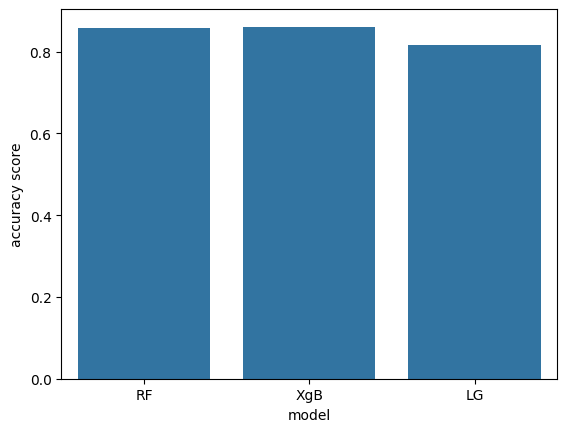

In [66]:
sns.barplot(x='model',y='accuracy score',data=dic)

# **conclusion**
From the perfomance evaluation Gradient Boosting have highest accuracy.and also using
other perfomance evaluation precision value is high for  Gradient Boosting  .so we choose Gradient boosting as the best model

# **Predicting New Datapoint**

In [67]:
xg_model.predict([[600,1,1,55,2,0.786,1,0,0,79864.55]])

array([0])